In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
%matplotlib inline

In [3]:
from pathlib import Path
from PySide2.QtWidgets import QFileDialog, QApplication
from PySide2.QtCore import Qt
# if using outside the docker container append corems path to sys.path and then: 
from corems.mass_spectrum.input.massList import ReadMassList
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.mass_spectrum.factory.classification import HeteroatomsClassification, Labels 

# Load data

### Get the full path of the file using Pyside2 
Install Pyside2 separately. It is not a requirement from CoreMS, therefore you need to install it using:
- pip install PySide2, or
- pip3 install PySide2, or
- python -m install PySide2

In [4]:
app = QApplication(sys.argv)

In [5]:
file_dialog = QFileDialog()
file_dialog.setWindowFlags(Qt.WindowStaysOnTopHint)

file_location = file_dialog.getOpenFileName()[0]
app.quit()

### Load the mass spectrum data from a text mass list in centroid mode (default behaviour)

In [6]:
mass_spectrum = ReadMassList(file_location).get_mass_spectrum(polarity=-1)
print(mass_spectrum)

### Mass spectrum vizualization

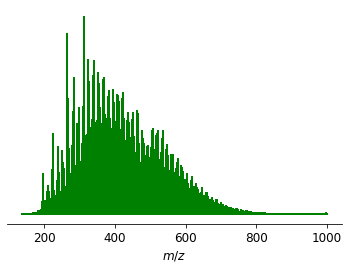

In [7]:
mass_spectrum.plot_centroid()

# Molecular formula assigment using oxygen prioritization approach
The oxygen priority assignment algorithm automatically finds the best oxygen series across a broad m/z range (for each m/z 14 Da) and use this series as the reference for a top-down priority assignment. 
The steps are: 
1. Sets Kendrick base to C1H2O1
2. Noise removal using Kendrick filter using DBSCAN
3. Identify the most abundant peak 
4. Search for molecular formulae candidates of classes Oo, then SsOo, NnOo, 
5. Stop the search on the first candidate found
6. "Walks" in 14 Da increments in ascending and descending m/z order, pick the most abundant peak, and repeat steps 3, 4, and 5.
7. Sort the identified series by reverse order of peak height
8. Use heteroatom class order for an assignment of all peaks
9. Look for non-oxygen classes, i.e Nn, NnSs


### Mass error settings

In [8]:
mass_spectrum.molform_search_settings.error_method = 'None'
mass_spectrum.molform_search_settings.min_ppm_error  = -1.0
mass_spectrum.molform_search_settings.max_ppm_error = 1.0

### Available methods for best molecular formula candidate selection

In [9]:
mass_spectrum.molform_search_settings.score_methods

['S_P_lowest_error',
 'N_S_P_lowest_error',
 'lowest_error',
 'prob_score',
 'air_filter_error',
 'water_filter_error',
 'earth_filter_error']

### Selection of best molecular formula candidate method

In [10]:
mass_spectrum.molform_search_settings.score_method = "N_S_P_lowest_error"

### Settings for molecular formulae assigment

In [11]:
mass_spectrum.molform_search_settings.usedAtoms['C'] = (1,90)
mass_spectrum.molform_search_settings.usedAtoms['H'] = (4,200)
mass_spectrum.molform_search_settings.usedAtoms['O'] = (0,20)
mass_spectrum.molform_search_settings.usedAtoms['N'] = (0,1)
mass_spectrum.molform_search_settings.usedAtoms['S'] = (0,0)
mass_spectrum.molform_search_settings.usedAtoms['Cl'] = (0,1)

mass_spectrum.molform_search_settings.isProtonated = True
mass_spectrum.molform_search_settings.isRadical= False
mass_spectrum.molform_search_settings.isAdduct = True

mass_spectrum.molform_search_settings.min_dbe = 0
mass_spectrum.molform_search_settings.max_dbe = 30

### Run oxygen priority assignment algorithm 

Estimated number of clusters: 1
Estimated number of noise points: 0



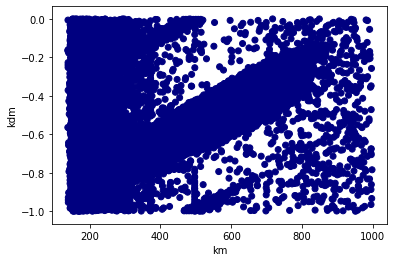

Start most abundant mass spectral peak search
Maximum abundance limit  = 218331554.2651716 and max abundance kendrick cluster = 546416064.0
Searching molecular formulas
Querying database for existing classes
Finished querying database for existing classes

Using 4 logical CPUs for database entry generation
creating database entry for 92 classes
Started molecular formula table generation
Finished molecular formula table generation

Started molecular formula table generation
Finished molecular formula table generation

Finished searching molecular formulas
Select most abundant peak with molecular formula =  C16 H15 O8 with a m/z error of -0.024650559203507276 ppm
Started mass spectral peak series search
min_mz 138.31860980000002
max_mz 998.8996007999999
Querying database for existing classes
Finished querying database for existing classes

Started molecular formula table generation
Finished molecular formula table generation

Started molecular formula table generation
Finished molecular 

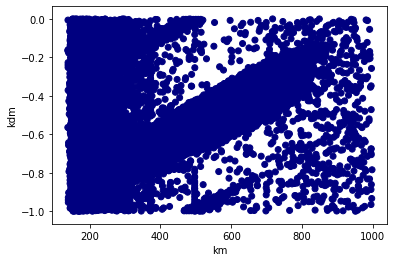

Started molecular formula search for class O11
Estimated number of clusters: 1
Estimated number of noise points: 1

Started molecular formula search for class O13
Estimated number of clusters: 1
Estimated number of noise points: 1

Started molecular formula search for class O12
Estimated number of clusters: 1
Estimated number of noise points: 1

Started molecular formula search for class O8
Estimated number of clusters: 1
Estimated number of noise points: 3

Started molecular formula search for class O9
Estimated number of clusters: 1
Estimated number of noise points: 3

Started molecular formula search for class O14
Estimated number of clusters: 1
Estimated number of noise points: 2

Started molecular formula search for class O15
Estimated number of clusters: 1
Estimated number of noise points: 2

Started molecular formula search for class O10
Estimated number of clusters: 1
Estimated number of noise points: 1

Started molecular formula search for class O7
Estimated number of clusters

Estimated number of clusters: 0
Estimated number of noise points: 9

Started molecular formula search for class N1 O14 Cl1
Estimated number of clusters: 1
Estimated number of noise points: 6

Started molecular formula search for class N1 O15 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 13

Started molecular formula search for class N1 O10 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 8

Started molecular formula search for class N1 O7 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 3

Started molecular formula search for class N1 O16 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 5

Started molecular formula search for class N1 O6 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 9

Started molecular formula search for class N1 O17 Cl1
Estimated number of clusters: 0
Estimated number of noise points: 5

Started molecular formula search for class N1 O18 Cl1
Estimated number 

In [12]:
OxygenPriorityAssignment(mass_spectrum).run()


### Molecular Formula Statistics

In [13]:
mass_spectrum.percentile_assigned()

8295 peaks assigned and 14496 peaks not assigned , total  = 36.40 %, relative abundance = 81.29 %


(8295, 14496, 36.39594576806634, 81.28977201813784)

# HeteroatomsClassification

In [14]:
mass_spectrum_by_classes = HeteroatomsClassification(mass_spectrum)

### Mass spectrum Assigned vs Unassigned

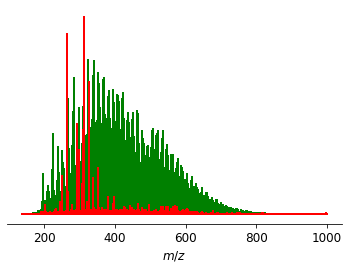

In [15]:
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### Mass spectrum for each individual heteroatomic classes

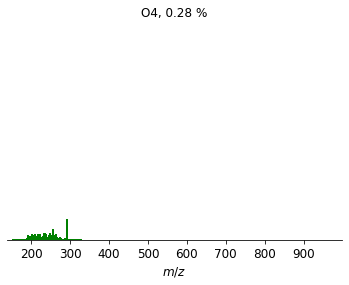

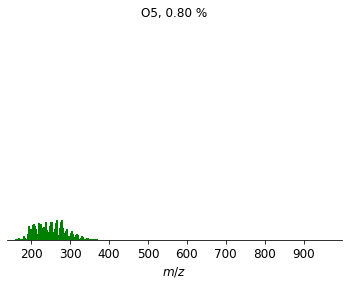

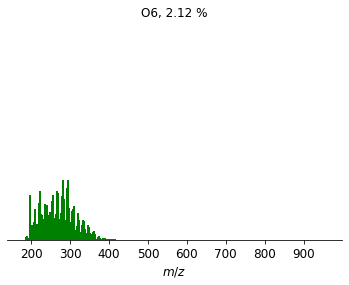

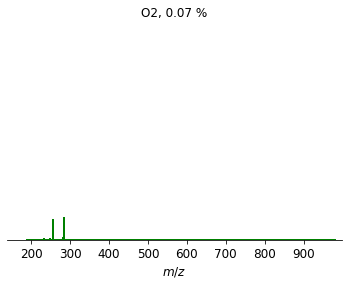

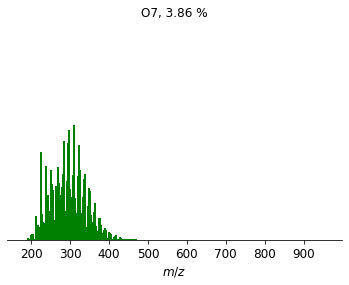

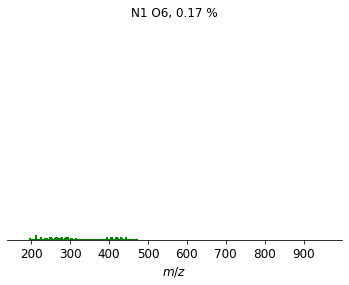

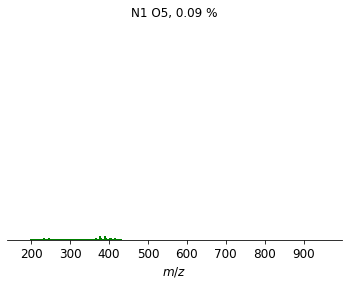

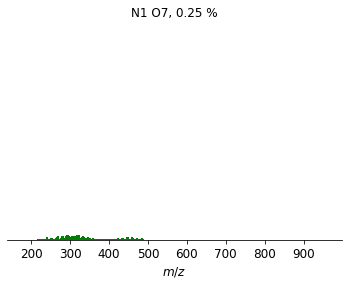

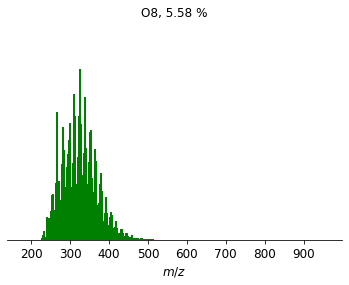

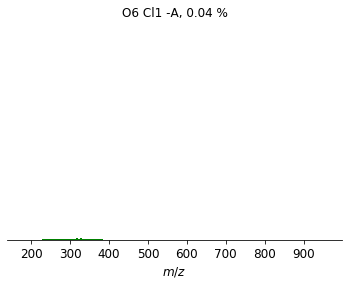

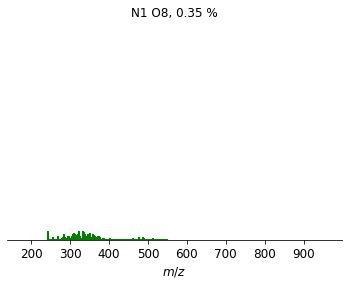

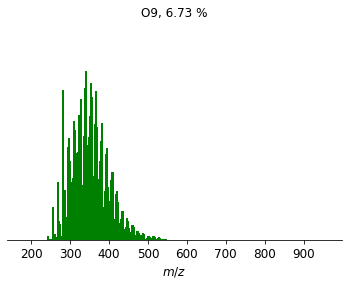

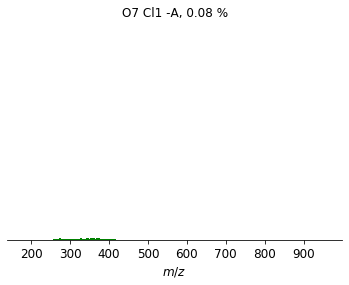

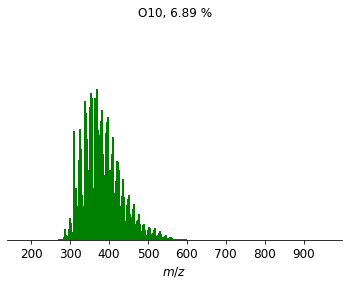

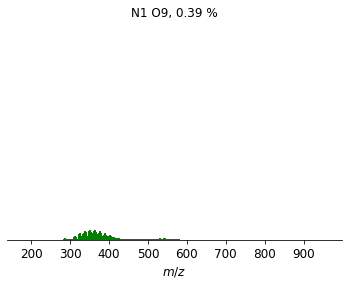

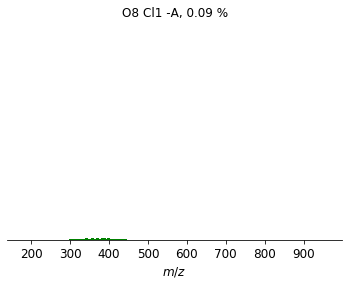

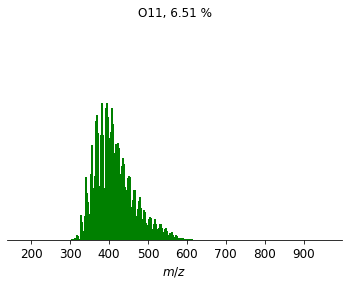

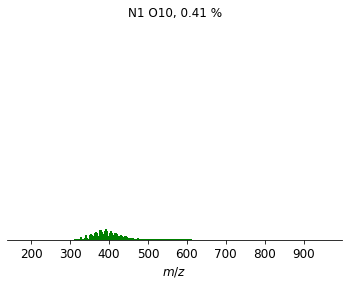

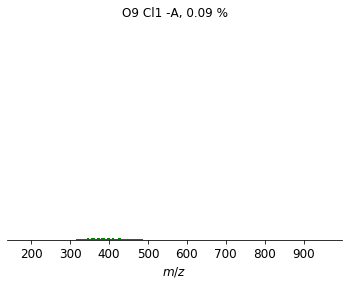

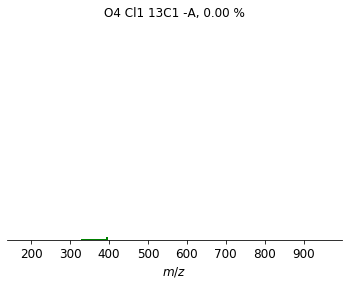

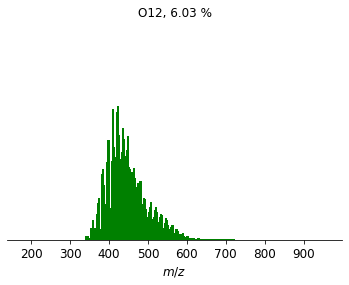

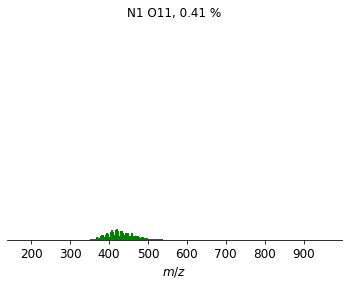

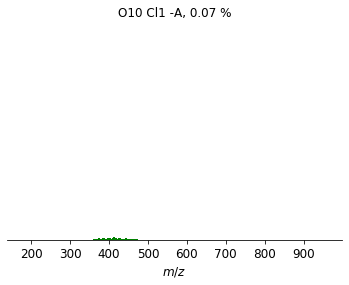

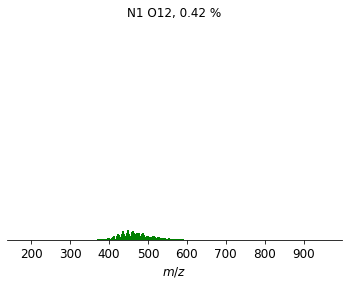

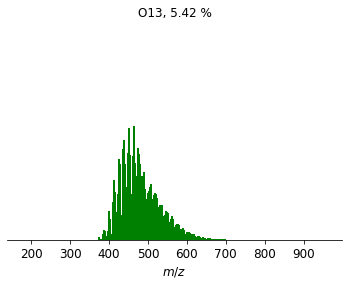

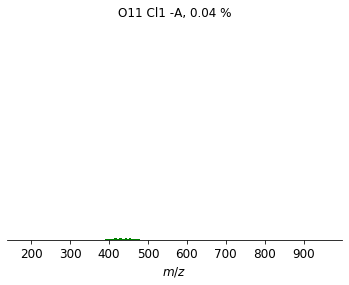

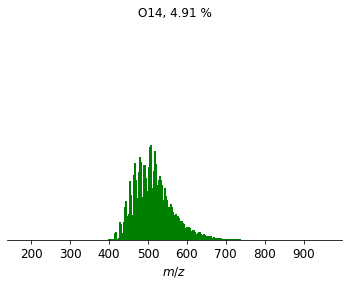

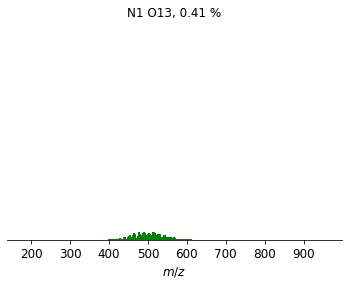

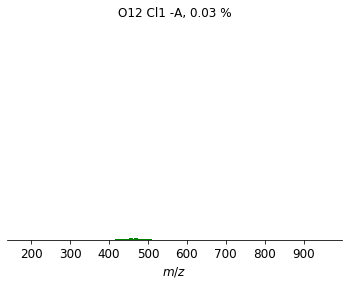

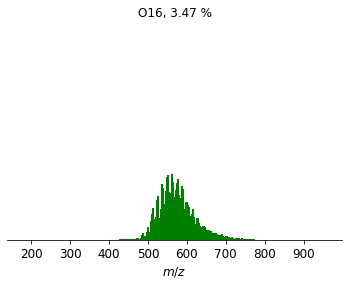

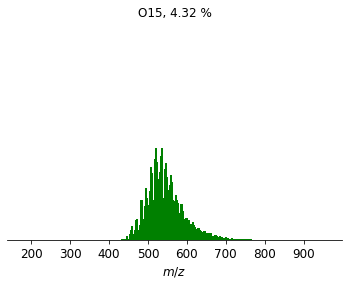

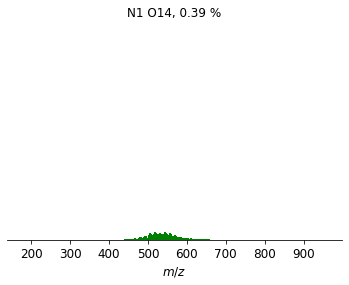

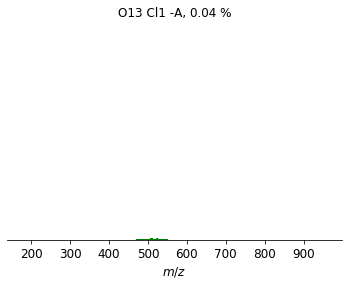

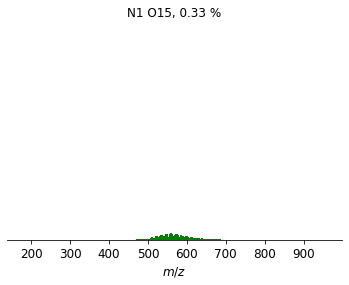

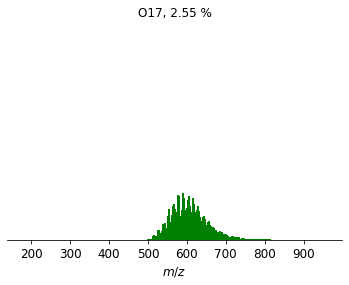

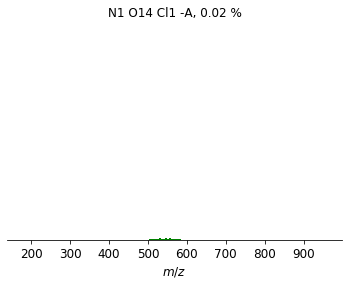

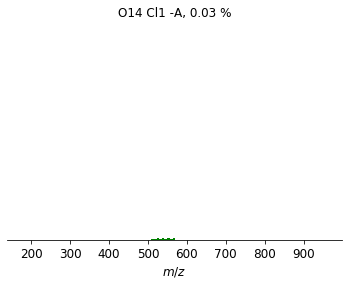

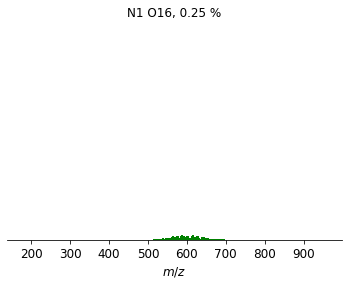

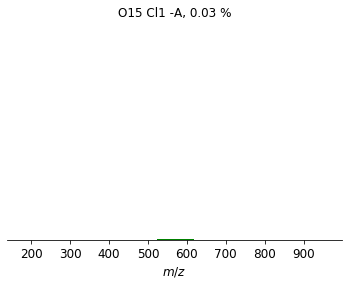

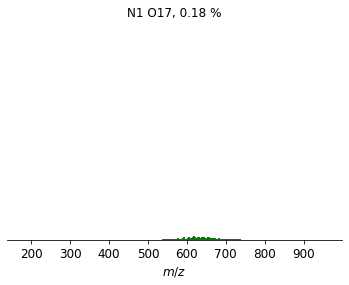

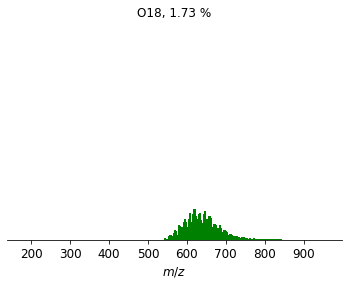

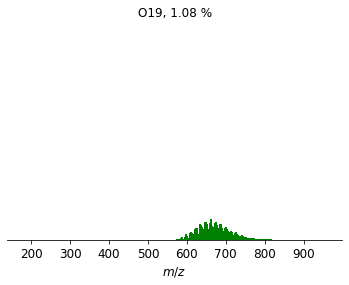

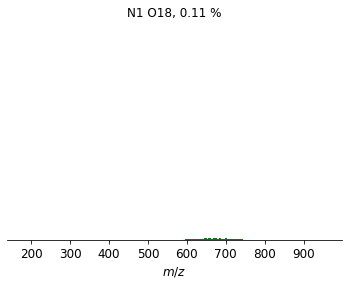

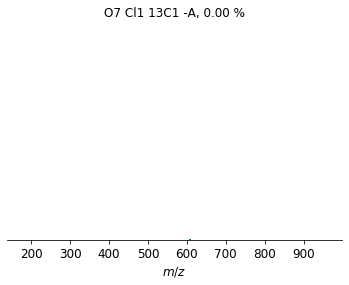

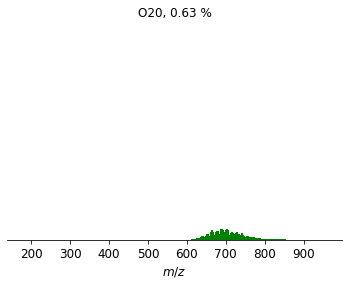

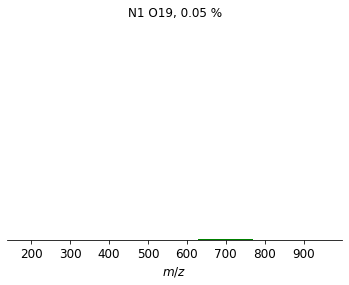

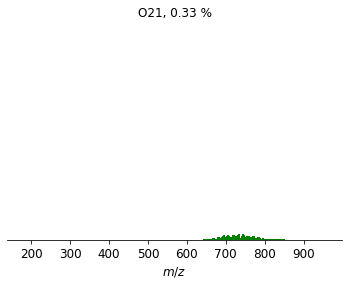

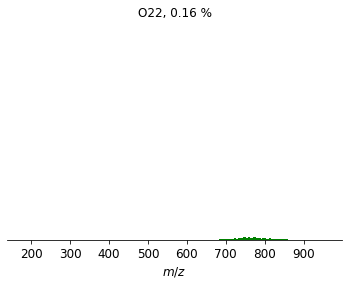

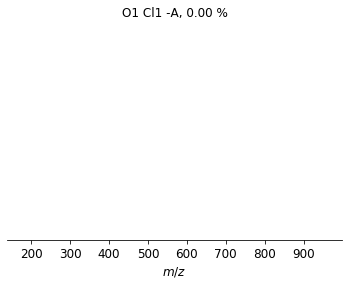

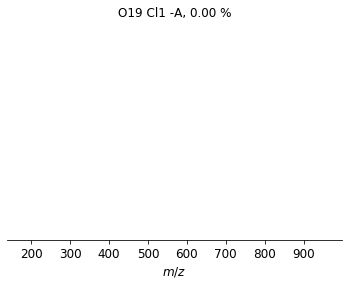

In [16]:
for classe in mass_spectrum_by_classes.get_classes(threshold_perc=0, isotopologue=False):
            
        mass_spectrum_by_classes.plot_ms_class(classe)
        matplotlib.pyplot.show()

### Individual DBE vs. Carbon number diagram plots 

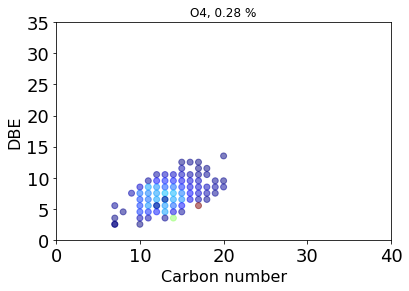

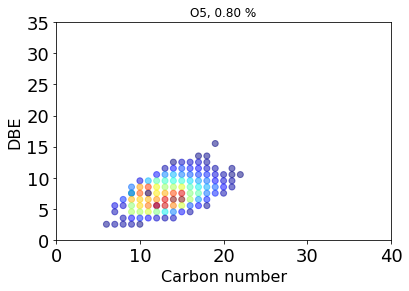

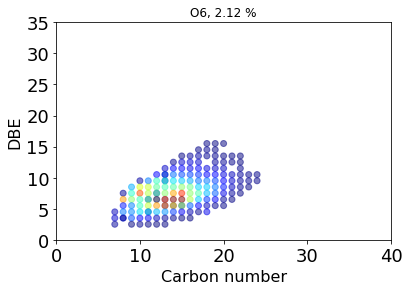

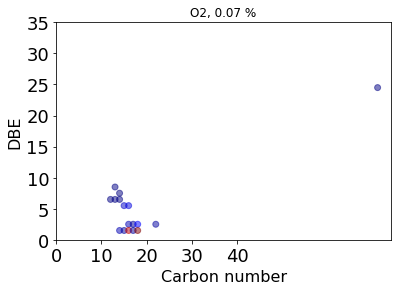

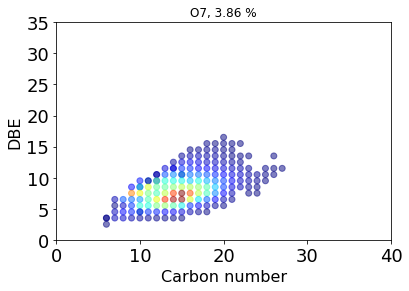

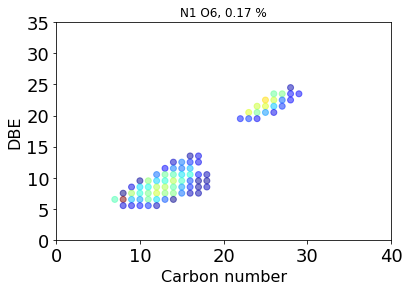

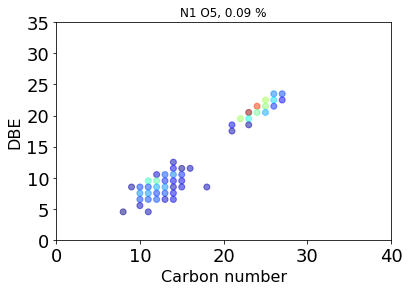

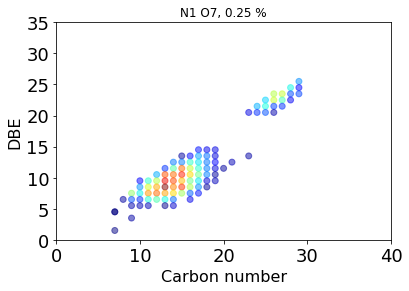

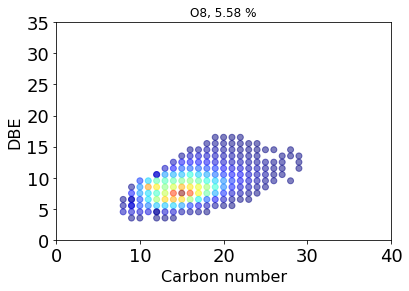

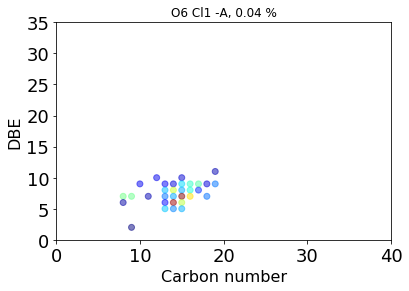

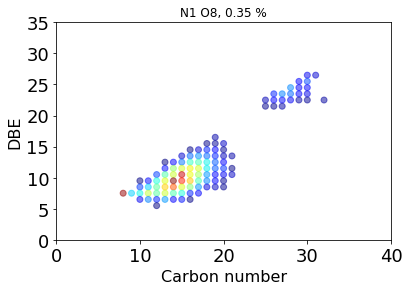

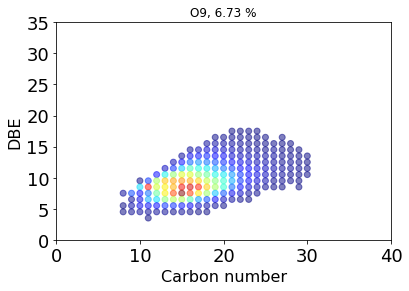

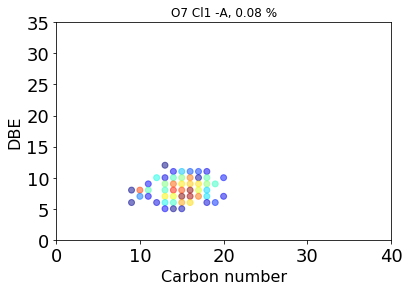

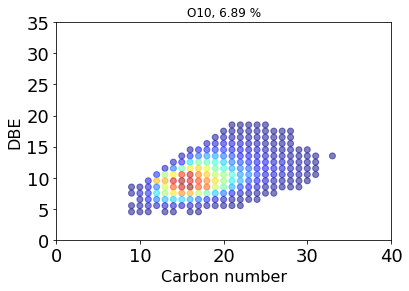

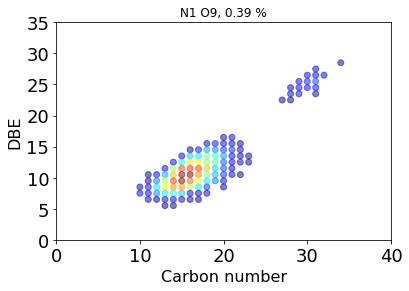

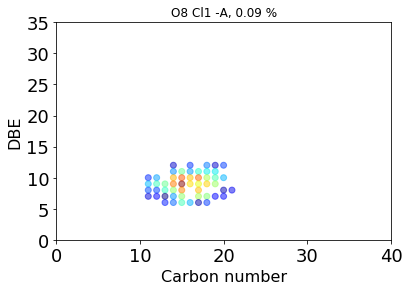

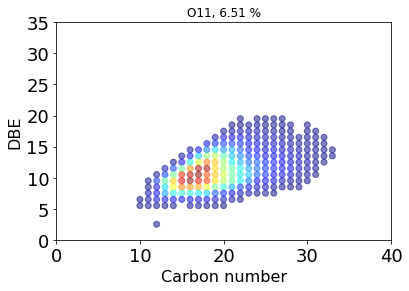

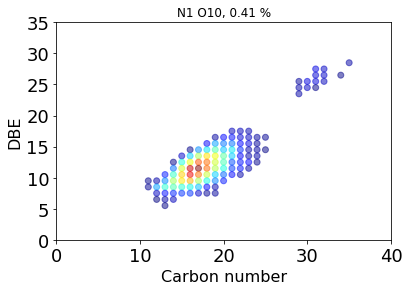

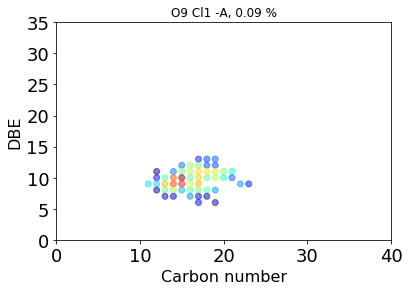

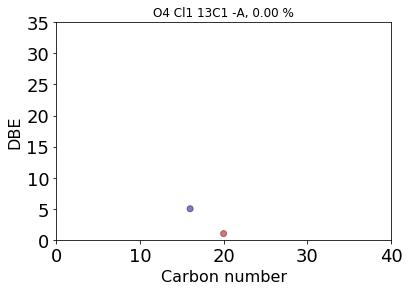

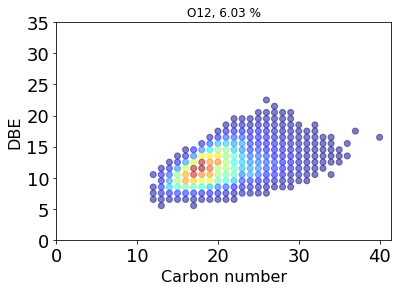

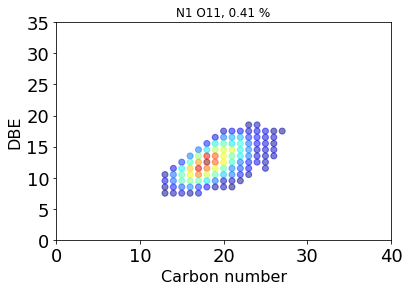

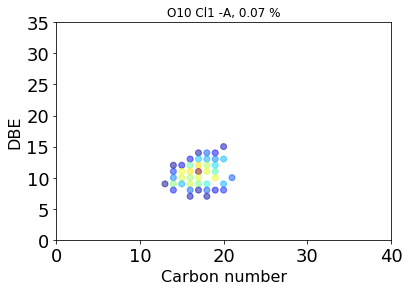

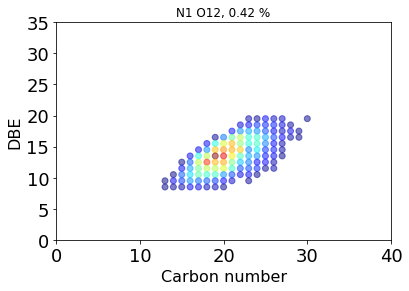

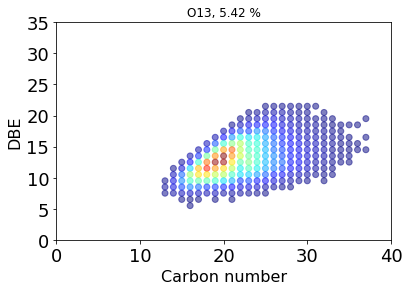

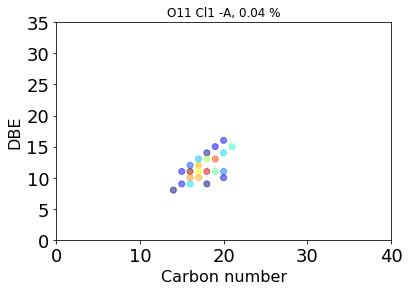

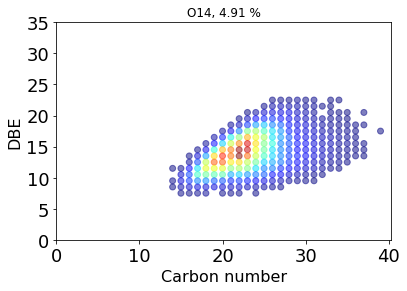

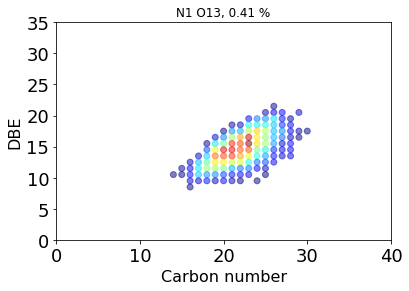

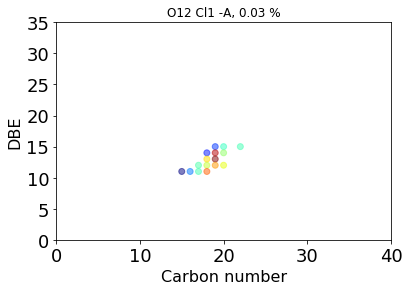

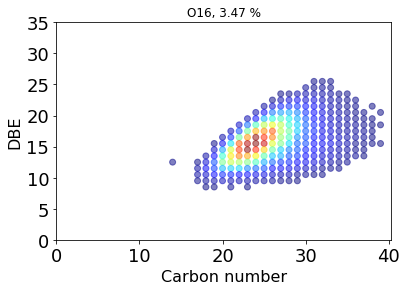

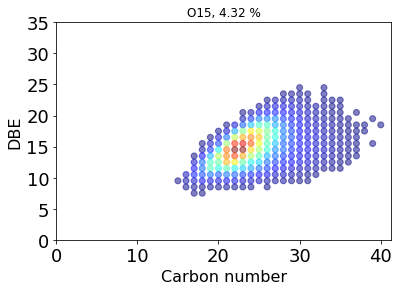

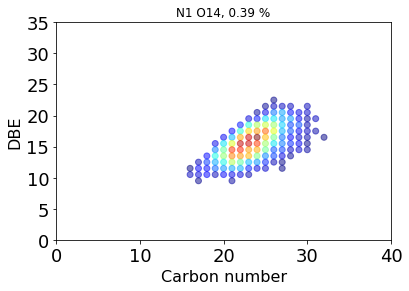

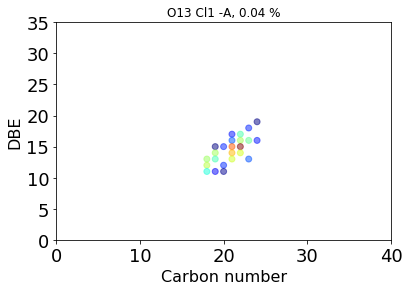

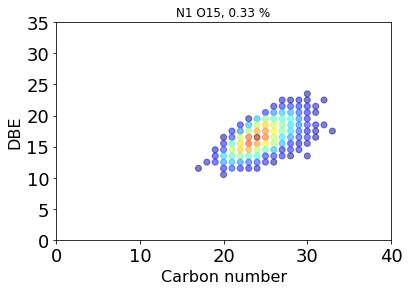

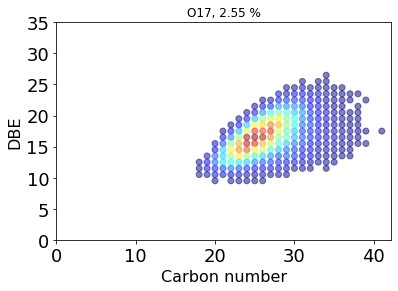

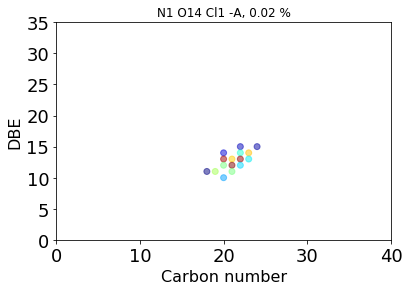

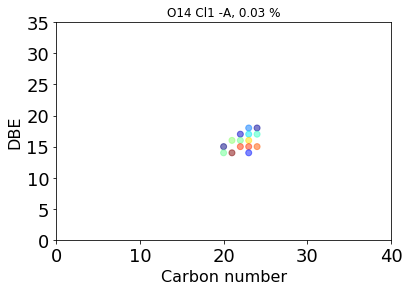

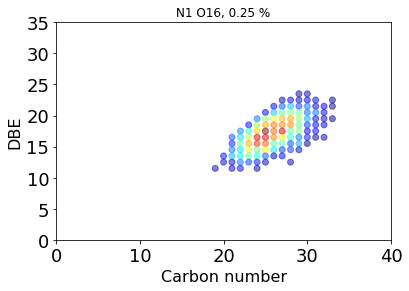

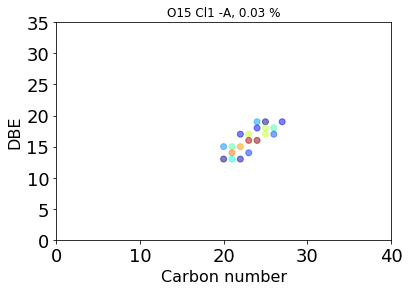

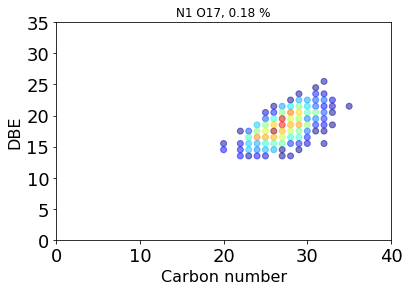

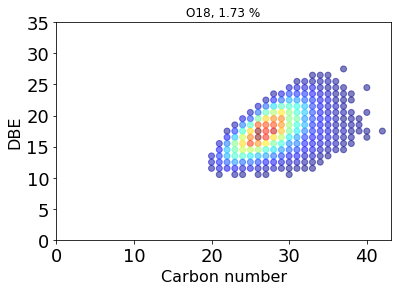

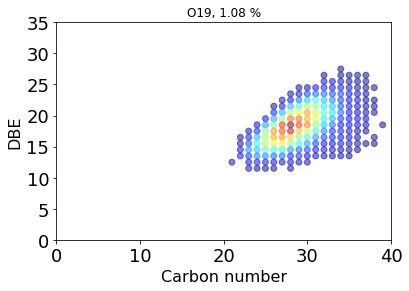

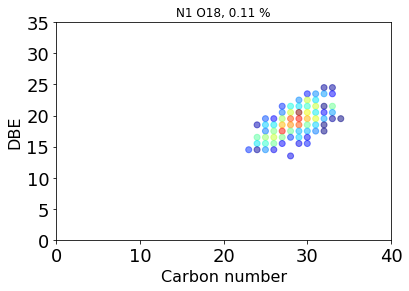

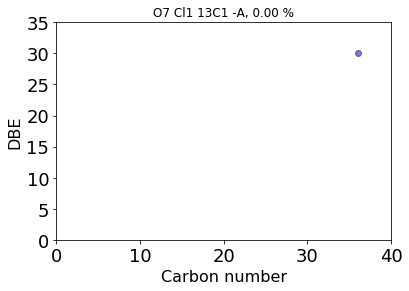

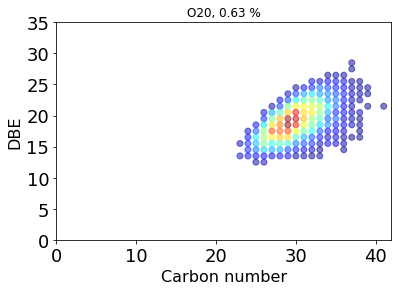

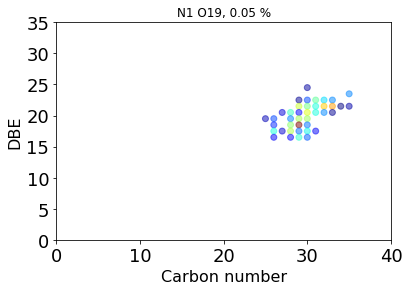

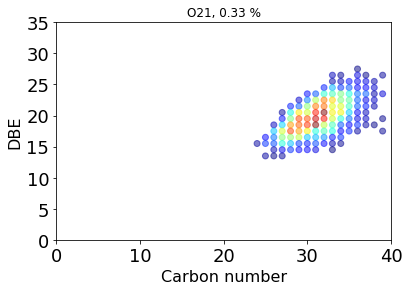

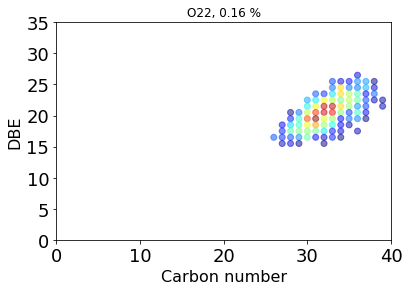

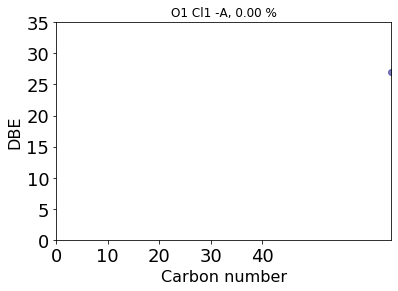

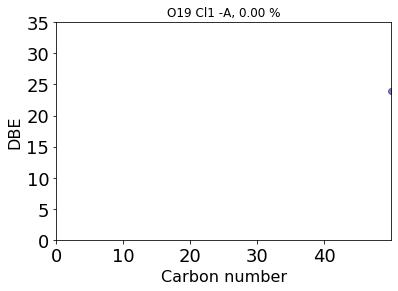

In [17]:
for classe in mass_spectrum_by_classes.get_classes(threshold_perc=0, isotopologue=False):
            
        mass_spectrum_by_classes.plot_dbe_vs_carbon_number(classe)
        matplotlib.pyplot.show()

# Export data to CSV 
No need to change the filename suffix, the function "to_csv()" convert the suffix to .csv automatically

In [18]:
output_file = file_location.split(".txt")[0]

output_file = output_file + "_Oxygen_Priority_lowest_error_score"

print(output_file)

mass_spectrum.to_csv(output_file)

C:/Users/eber373/Desktop/Data/20190709_WK_CADY_Auto_SRFA_QC_O40_1_01_71_Oxygen_Priority_lowest_error_score
